In [1]:
# import libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt



In [2]:
# Load CSV files and assign to variables
i_fod = pd.read_csv("ics209plus-wf-incidents-fod-draft_1999to2023.csv")
i_ref = pd.read_csv("ics209plus-wf_incidents-reference_2014to2023.csv")
c_daily = pd.read_csv("ics209plus-wf_complex-assoc-daily_2014to2023-draft.csv")
c_summary = pd.read_csv("ics209plus-wf-complex-summary-draft_2014to2023.csv")

C:\Users\moenc\AppData\Local\Temp\ipykernel_22828\2950357163.py:2: DtypeWarning: Columns (1,26,28,35,36,37,38,44,45) have mixed types. Specify dtype option on import or set low_memory=False.
  i_fod = pd.read_csv("ics209plus-wf-incidents-fod-draft_1999to2023.csv")
C:\Users\moenc\AppData\Local\Temp\ipykernel_22828\2950357163.py:3: DtypeWarning: Columns (42,51,52,53,54,55,61) have mixed types. Specify dtype option on import or set low_memory=False.
  i_ref = pd.read_csv("ics209plus-wf_incidents-reference_2014to2023.csv")


In [3]:
from IPython.display import display, HTML

def show_df(df, height=400):
    """Display a scrollable HTML table of the DataFrame or a GroupBy object."""

    # If the object is a GroupBy object, first apply an aggregation (e.g., count, sum, mean)
    if isinstance(df, pd.core.groupby.DataFrameGroupBy):
        # Here we apply a count aggregation, but you can change it to other aggregations like sum, mean, etc.
        df = df.size().reset_index(name='count')

    # Display the DataFrame in a scrollable HTML format
    display(HTML(f"""
    <div style="height:{height}px; overflow:auto">
        {df.to_html(max_rows=None, max_cols=None)}
    </div>
    """))

In [4]:
unique_counts = i_ref.nunique()

# Print results nicely
for column, count in unique_counts.items():
    print(f"{column}: {count} ")

Unnamed: 0: 16963 
ACRES: 5553 
CAUSE: 4 
COMPLEX: 2 
COMPLEXITY_LEVEL: 5 
COMPLEXITY_LEVEL_NARR: 1109 
CREATED_BY: 170 
CREATED_DATE: 16256 
CY: 10 
DISCOVERY_DATE: 16307 
DONWCGU_PROT_UNIT_IDENTIFIER: 3279 
EST_IM_COST_TO_DATE: 4255 
EXT_SYSTEM_LAST_MODIFIED_BY: 18 
EXT_SYSTEM_LAST_MODIFIED_DATE: 14809 
FIRECODE: 8817 
INCIDENT_AREA: 5543 
INCIDENT_COMMANDERS_NARR: 10081 
INCIDENT_ID: 16963 
INCIDENT_IDENTIFIER: 16963 
INCIDENT_NAME: 13664 
INCIDENT_NUMBER: 10349 
INCTYP_ABBREVIATION: 17 
INC_AREA_UOM: 2 
INC_MGMT_ORG: 9 
IRWIN_IDENTIFIER: 16088 
LAST_MODIFIED_BY: 7 
LAST_MODIFIED_DATE: 15738 
LOCAL_TIMEZONE: 19 
NWCG_OWN_UNIT_IDENTIFIER: 3292 
NWCG_PROT_UNIT_IDENTIFIER: 3031 
OWN_UNIT_ID: 1010 
OWN_UNIT_NAME: 1041 
OWN_UNIT_TYPE: 11 
PCT_CONTAINED_COMPLETED: 83 
PCT_CONT_COMPL_UOM: 1 
POO_CITY: 4125 
POO_COUNTY_CODE: 256 
POO_DONWCGU_OWN_IDENTIFIER: 3504 
POO_LATITUDE: 9750 
POO_LD_PM: 41 
POO_LD_QTR_QTR_QTR_QTR_SEC: 0 
POO_LD_QTR_QTR_QTR_SEC: 0 
POO_LD_QTR_QTR_SEC: 4 
POO_LD_QTR_SE

In [5]:
show_df(i_ref.head(30))

,Unnamed: 0,ACRES,CAUSE,COMPLEX,COMPLEXITY_LEVEL,COMPLEXITY_LEVEL_NARR,CREATED_BY,CREATED_DATE,CY,DISCOVERY_DATE,DONWCGU_PROT_UNIT_IDENTIFIER,EST_IM_COST_TO_DATE,EXT_SYSTEM_LAST_MODIFIED_BY,EXT_SYSTEM_LAST_MODIFIED_DATE,FIRECODE,INCIDENT_AREA,INCIDENT_COMMANDERS_NARR,INCIDENT_ID,INCIDENT_IDENTIFIER,INCIDENT_NAME,INCIDENT_NUMBER,INCTYP_ABBREVIATION,INC_AREA_UOM,INC_MGMT_ORG,IRWIN_IDENTIFIER,LAST_MODIFIED_BY,LAST_MODIFIED_DATE,LOCAL_TIMEZONE,NWCG_OWN_UNIT_IDENTIFIER,NWCG_PROT_UNIT_IDENTIFIER,OWN_UNIT_ID,OWN_UNIT_NAME,OWN_UNIT_TYPE,PCT_CONTAINED_COMPLETED,PCT_CONT_COMPL_UOM,POO_CITY,POO_COUNTY_CODE,POO_DONWCGU_OWN_IDENTIFIER,POO_LATITUDE,POO_LD_PM,POO_LD_QTR_QTR_QTR_QTR_SEC,POO_LD_QTR_QTR_QTR_SEC,POO_LD_QTR_QTR_SEC,POO_LD_QTR_SEC,POO_LD_RGE,POO_LD_SEC,POO_LD_TWP,POO_LONGITUDE,POO_SHORT_LOCATION_DESC,POO_STATE_ABBREV,POO_STATE_NAME,POO_US_NGR_XCOORD,POO_US_NGR_YCOORD,POO_US_NGR_ZONE,POO_UTM_EASTING,POO_UTM_NORTHING,POO_UTM_ZONE,PROT_UNIT_ID,PROT_UNIT_NAME,PROT_UNIT_TYPE,START_YEAR,UNIFIED_COMMAND
0,0,1300.0,H,False,NaN,NaN,SIT209,2014-01-15 10:31:48,2014,2014-01-12 11:45:00,9211.0,300000.0,ics209,2014-03-27 21:11:36,NaN,1300.0,NaN,2014_247520_POST ROAD FIRE,247520.0,POST ROAD FIRE,42025,WF,Acres,NaN,NaN,SIT209,2014-03-27 21:11:37,NaN,4985.0,NaN,OKOKS,Oklahoma Division of Forestry,State,100.0,NaN,Guthrie,83.0,9211.0,35.920278,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,97.359167,"4 miles NE of Guthrie, OK.",OK,OKLAHOMA,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2014.0,NaN
1,1,400.0,H,False,NaN,NaN,SIT209,2014-01-15 11:05:06,2014,2014-01-12 14:00:00,9211.0,0.0,ics209,2014-03-27 21:11:36,NaN,400.0,NaN,2014_247532_COLLEGE AVE. FIRE,247532.0,COLLEGE AVE. FIRE,42026,WF,Acres,NaN,NaN,SIT209,2014-03-27 21:11:37,NaN,4985.0,NaN,OKOKS,Oklahoma Division of Forestry,State,99.0,NaN,Guthrie,83.0,9211.0,35.885278,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,97.495833,"4 Mi. W of Guthrie, OK",OK,OKLAHOMA,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2014.0,NaN
2,2,1612.0,L,False,NaN,NaN,SIT209,2014-01-15 19:32:24,2014,2014-01-14 10:45:00,9556.0,520000.0,ics209,2014-03-27 21:11:36,NaN,1612.0,NaN,2014_247609_SODA,247609.0,SODA,120,WF,Acres,NaN,NaN,SIT209,2014-10-14 14:41:17,NaN,2413.0,NaN,CASQF,Sequoia National Forest,Federal,0.0,NaN,SPRINGVILLE,107.0,9556.0,36.208333,Mount Diablo,NaN,NaN,NaN,NaN,32E,5.0,20S,118.525278,20 MILES NORTH EAST OF SPRINGVILLE CA,CA,CALIFORNIA,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2014.0,NaN
3,3,1.0,H,False,NaN,NaN,SIT209,2014-01-17 11:17:28,2014,2014-01-16 15:45:00,8908.0,1000.0,ics209,2014-03-27 21:11:36,NaN,1.0,NaN,2014_248307_SOUTH BEND,248307.0,SOUTH BEND,001D3,WF,Acres,NaN,NaN,SIT209,2014-03-27 21:11:37,NaN,222652.0,NaN,ARPRI,Private,Private,97.0,NaN,South Bend,85.0,225895.0,34.822222,Louisiana,NaN,NaN,SW,NW,10W,12.0,2N,-92.033889,Unknown,AR,ARKANSAS,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2014.0,NaN
4,4,40.0,U,False,NaN,NaN,SIT209,2014-01-17 12:29:20,2014,2014-01-16 14:30:00,8908.0,1.0,ics209,2014-03-27 21:11:36,NaN,40.0,NaN,2014_248316_NEWARK,248316.0,NEWARK,016D8,WF,Acres,NaN,NaN,SIT209,2014-03-27 21:11:37,NaN,222652.0,NaN,ARPRI,Private,Private,100.0,NaN,Newark,63.0,225895.0,35.756944,Fifth Principal,NaN,NaN,NE,NE,04W,22.0,13N,-91.401111,"3 miles North of Newark, AR",AR,ARKANSAS,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2014.0,NaN
5,5,214.7,U,False,NaN,NaN,SIT209,2014-01-20 06:59:45,2014,2014-01-19 13:00:00,9073.0,4000.0,ics209,2014-03-27 21:11:36,NaN,214.7,NaN,2014_248603_YOUNG ROAD FIRE,248603.0,YOUNG ROAD FIRE,420-3102-026.,WF,Acres,NaN,NaN,SIT209,2014-03-27 21:11:37,NaN,222659.0,NaN,GAPRI,Private,Private,100.0,NaN,NaN,53.0,225999.0,32.465278,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,84.657222,Hwy 355 at Young Rd,GA,GEORGIA,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2014.0,NaN
6,6,1952.0,U,False,NaN,NaN,SIT209,2014-01-20 15:19:13,2014,2014-01-16 08:00:00,8887.0,6999000.0,ics209,2014-03-27 21:11:36,NaN,1952.0,NaN,2014_249140_COLBY,249140.0,COLBY,231,WF,Acres,NaN,NaN,SIT209,2014-03-27 21:11:37,NaN,1410.0,NaN,CAANF,Angeles National Forest,Federal,98.0,NaN,Glendora,37.0,8887.0,34.1588

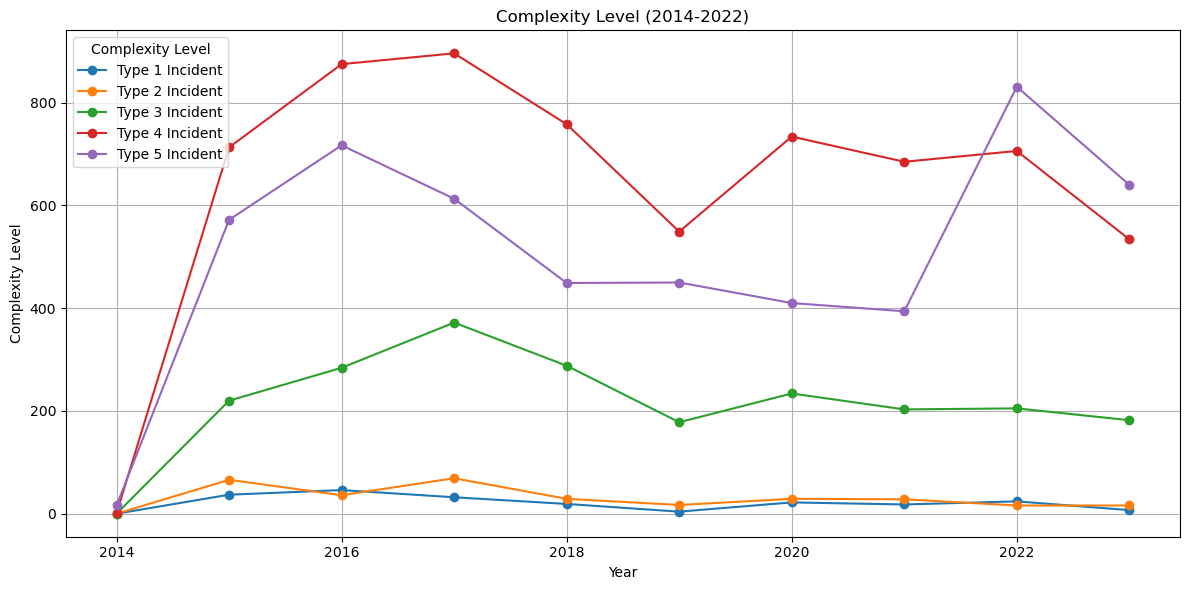

In [6]:

# %% [code]
# Extract the year from the discovery date
i_ref['DISCOVERY_DATE'] = pd.to_datetime(i_ref['DISCOVERY_DATE']) # Convert 'DISCOVERY_DATE' to datetime
i_ref['YEAR'] = i_ref['DISCOVERY_DATE'].dt.year

# Group by year and cause, then count the number of fires
complexity_level = i_ref.groupby(['YEAR', 'COMPLEXITY_LEVEL']).size().unstack(fill_value=0)

# Plotting
plt.figure(figsize=(12, 6))
complexity_level.plot(kind='line', marker='o', ax=plt.gca())

plt.title('Complexity Level (2014-2022)')
plt.xlabel('Year')
plt.ylabel('Complexity Level')
plt.legend(title='Complexity Level', labels=['Type 1 Incident', 'Type 2 Incident', 'Type 3 Incident', 'Type 4 Incident', 'Type 5 Incident'])
plt.grid(True)
plt.tight_layout()
plt.show()


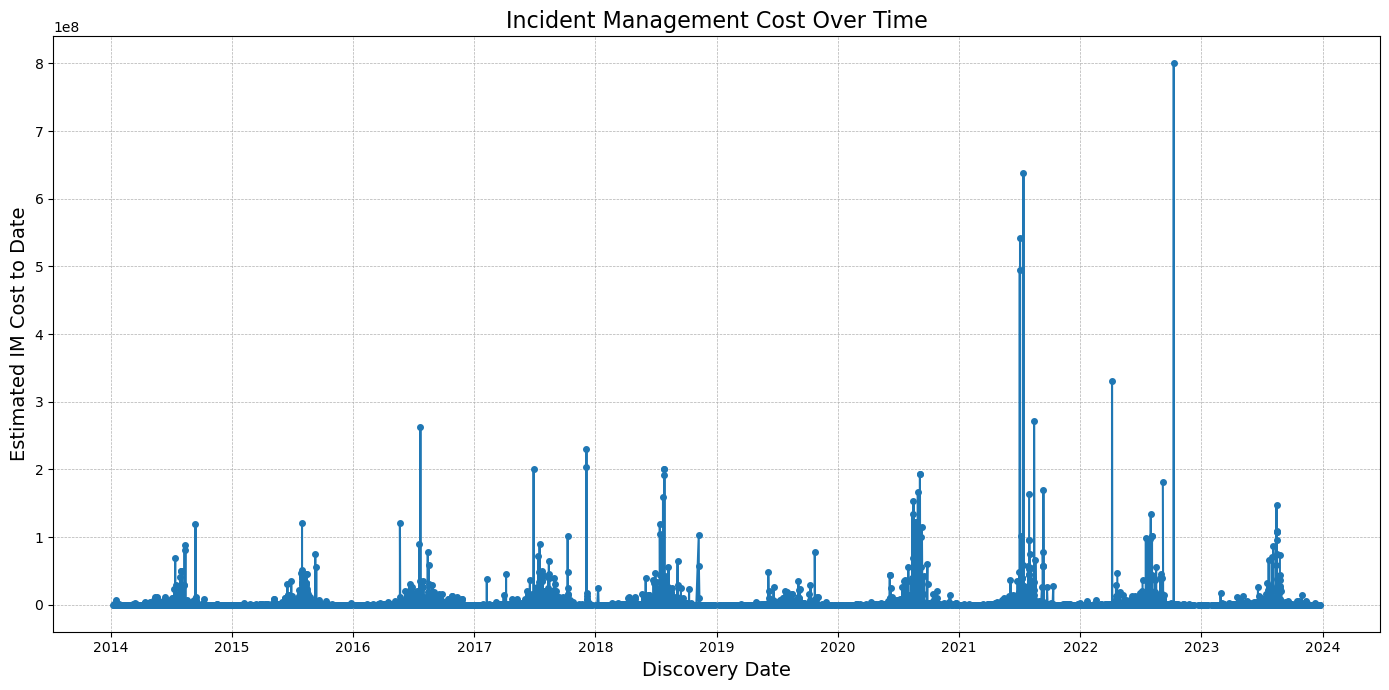

In [7]:
# Make sure 'DISCOVERY_DATE' is datetime
i_ref['DISCOVERY_DATE'] = pd.to_datetime(i_ref['DISCOVERY_DATE'], format='mixed')

# Sort by date (optional but good for plotting)
i_ref = i_ref.sort_values('DISCOVERY_DATE')

# Plotting
plt.figure(figsize=(14, 7))
plt.plot(i_ref['DISCOVERY_DATE'], i_ref['EST_IM_COST_TO_DATE'], marker='o', linestyle='-', markersize=4)

# If there are too many points, you can also use alpha for transparency:
# plt.plot(i_ref['DISCOVERY_DATE'], i_ref['EST_IM_COST_TO_DATE'], marker='o', linestyle='-', markersize=4, alpha=0.7)

plt.title('Incident Management Cost Over Time', fontsize=16)
plt.xlabel('Discovery Date', fontsize=14)
plt.ylabel('Estimated IM Cost to Date', fontsize=14)
plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.tight_layout()

# Optional: log scale if costs vary widely
# plt.yscale('log')

plt.show()